# 0 - Introduction to scikit-mobility

#### We are presenting the alpha version, any feedback is welcome :)

### Contacts

- Luca Pappalardo - <lucapappalardo1984@gmail.com>
- Gianni Barlacchi - <gianni.barlacchi@gmail.com>
- Filippo Simini - <filippo.simini@gmail.com>

### What is scikit-mobility?

**scikit-mobility** is a Python package that provides easy methods to work with mobility data. The library extends the datatypes used by Pandas to allow working with trajectories and fluxes of mobility. 

scikit-mobility is well suited for working with:

- **trajectories** composed by latitude/longitude points (e.g. GPS data)
- **fluxes** of movements between places (e.g. OD matrix)


We extended Pandas to provide a user-friendly, powerful and stable basic data structures.

The two primary data structures of scikit-mobility are:

- **TrajDataFrame** - a dataframe designed to deal with mobility trajectories.
- **FlowDataFrame** - a dataframe designed to deal with fluxes of movements mapped into a tessellation


### What to do with scikit-mobility?

Here are just a few of the things that scikit-mobility does well:

- **Preprocessing** of mobility data such as clustering, compressing, detecting and filtering trajectories. 
- **Measuring** individual and collective mobility behaviours.
- **Modeling** individual trajectories of syntetic agents and collective flows of populations.
    

# TrajDataFrame


A `TrajDataFrame` is a Pandas DataFrame where row contains information regarding a point of the trajectory. There is no limit in the number of columns it can contains, but there three of them must always be present:

- `lat` - latitude of the point
- `lng` - longitude of the point
- `datetime` - date and time at which the point was visited

Additionaly, for multi-user and multi-trajectory dataset, there are two optional columns:

- `uid` - identifier for the user to which the trajectory belongs to
- `tid` - identifier for the trajectory

In [1]:
# Import the library

import skmob


## Construction of a `TrajDataFrame`

The `TrajDataFrame` can be created from:

- a python list or a numpy array
- a pandas `DataFrame`
- a python dictionary

### From `list`

In [2]:
# From a list

data_list = [[1, 39.984094, 116.319236, '2008-10-23 13:53:05'],
             [1, 39.984198, 116.319322, '2008-10-23 13:53:06'],
             [1, 39.984224, 116.319402, '2008-10-23 13:53:11'],
             [1, 39.984211, 116.319389, '2008-10-23 13:53:16']]
data_list

[[1, 39.984094, 116.319236, '2008-10-23 13:53:05'],
 [1, 39.984198, 116.319322, '2008-10-23 13:53:06'],
 [1, 39.984224, 116.319402, '2008-10-23 13:53:11'],
 [1, 39.984211, 116.319389, '2008-10-23 13:53:16']]

The constructor requires to know the indexes of the mandatory columns. We can set them by using the constructor arguments `latitude`, `longitude` and `datetime`.

In [44]:
tdf = skmob.TrajDataFrame(data_list, latitude=1, longitude=2, datetime=3)
tdf

,0,lat,lng,datetime
0,1,39.984094,116.319236,2008-10-23 13:53:05
1,1,39.984198,116.319322,2008-10-23 13:53:06
2,1,39.984224,116.319402,2008-10-23 13:53:11
3,1,39.984211,116.319389,2008-10-23 13:53:16


If present, we can also specify the index of the columns `uid` and `tid` using the contructor arguments `user_id` and `trajectory_id`.

In [45]:
tdf = skmob.TrajDataFrame(data_list, latitude=1, longitude=2, datetime=3, 
                          user_id=0)
tdf.head(5)

,uid,lat,lng,datetime
0,1,39.984094,116.319236,2008-10-23 13:53:05
1,1,39.984198,116.319322,2008-10-23 13:53:06
2,1,39.984224,116.319402,2008-10-23 13:53:11
3,1,39.984211,116.319389,2008-10-23 13:53:16


### From `DataFrame`

In [46]:
import pandas as pd

# Let's build a dataframe from the 2D list
data_df = pd.DataFrame(data_list, columns=['user', 'latitude', 'lng', 'hour'])

print(type(data_df))
data_df

<class 'pandas.core.frame.DataFrame'>


,user,latitude,lng,hour
0,1,39.984094,116.319236,2008-10-23 13:53:05
1,1,39.984198,116.319322,2008-10-23 13:53:06
2,1,39.984224,116.319402,2008-10-23 13:53:11
3,1,39.984211,116.319389,2008-10-23 13:53:16


The columns name in the dataframe don't match the names required from the TrajDataFrame.
We must specify the names of the mandatory columns in the original `DataFrame` using the constructor arguments `latitude`, `longitude` and `datetime`. If present, the columns for the user_id and the trajectory_id must also be specified.

In [47]:
tdf = skmob.TrajDataFrame(data_df, latitude='latitude', datetime='hour', 
                          user_id='user')

print(type(tdf))
tdf

<class 'skmob.core.trajectorydataframe.TrajDataFrame'>


,uid,lat,lng,datetime
0,1,39.984094,116.319236,2008-10-23 13:53:05
1,1,39.984198,116.319322,2008-10-23 13:53:06
2,1,39.984224,116.319402,2008-10-23 13:53:11
3,1,39.984211,116.319389,2008-10-23 13:53:16


### From `dictionary`

In [7]:
# Let's build a dataframe from the 2D list

data_dict = data_df.to_dict(orient='list')
data_dict

{'user': [1, 1, 1, 1],
 'latitude': [39.984094, 39.984198, 39.984224, 39.984211],
 'lng': [116.319236, 116.319322, 116.319402, 116.319389],
 'hour': ['2008-10-23 13:53:05',
  '2008-10-23 13:53:06',
  '2008-10-23 13:53:11',
  '2008-10-23 13:53:16']}

In [8]:
tdf = skmob.TrajDataFrame(data_dict, latitude='latitude', datetime='hour', 
                          user_id='user')
tdf

,uid,lat,lng,datetime
0,1,39.984094,116.319236,2008-10-23 13:53:05
1,1,39.984198,116.319322,2008-10-23 13:53:06
2,1,39.984224,116.319402,2008-10-23 13:53:11
3,1,39.984211,116.319389,2008-10-23 13:53:16


### From `file`

Most of the times, mobility data are stored in csv files. TrajDataFrame has its own method `from_file` to construct the object from an input file.

Let's try with a subsample of the GeoLife trajectories. The whole dataset can be found [here](https://www.microsoft.com/en-us/download/details.aspx?id=52367)

In [9]:
!gzcat ./data/geolife_sample.txt.gz | head

lat,lng,datetime,uid
39.984094,116.319236,2008-10-23 05:53:05,001
39.984198,116.319322,2008-10-23 05:53:06,001
39.984224,116.319402,2008-10-23 05:53:11,001
39.984211,116.319389,2008-10-23 05:53:16,001
39.984217,116.319422,2008-10-23 05:53:21,001
39.98471,116.319865,2008-10-23 05:53:23,001
39.984674,116.31981,2008-10-23 05:53:28,001
39.984623,116.319773,2008-10-23 05:53:33,001
39.984606,116.319732,2008-10-23 05:53:38,001
gzcat: error writing to output: Broken pipe
gzcat: ./data/geolife_sample.txt.gz: uncompress failed


In [48]:
# read a dataset containing trajectories (GeoLife subsample, the data)

tdf = skmob.TrajDataFrame.from_file('./data/geolife_sample.txt.gz', sep=',')

In [49]:
# Let's explore the dataframe as we would do with Pandas

tdf.head()

,lat,lng,datetime,uid
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1


## Properties

TrajDataFrame supports the possibility to add properties.

- `crs`: it's the coordinate reference system associated to the trajectories. By default epsg:4326 (lat/long)
- `parameters`: dictionary to add as many as necessary additional properties.

In [12]:
tdf.crs

{'init': 'epsg:4326'}

In [13]:
tdf.parameters

{'from_file': './data/geolife_sample.txt.gz'}

In [14]:
tdf.parameters['something'] = 5
tdf.parameters

{'from_file': './data/geolife_sample.txt.gz', 'something': 5}

## Column types

The mandatory (and optional) columns must have specific types.

In [15]:
# In the DataFrame
type(data_df)

pandas.core.frame.DataFrame

In [16]:
data_df.dtypes

user          int64
latitude    float64
lng         float64
hour         object
dtype: object

In [17]:
# In the TrajDataFrame
type(tdf)

skmob.core.trajectorydataframe.TrajDataFrame

In [18]:
tdf.dtypes

lat                float64
lng                float64
datetime    datetime64[ns]
uid                  int64
dtype: object

In [20]:
# We can access the columns as we would do with pandas

tdf.lat.head()

0    39.984094
1    39.984198
2    39.984224
3    39.984211
4    39.984217
Name: lat, dtype: float64

## Write and read a `TrajDataFrame`

To include all the metadata attached to TrajDataFrame and write/read them into a file, scikit-mobility provides ad-hoc methods.

### Write a `TrajDataFrame` to file

- including the `tdf.parameters` and `tdf.crs`
- automatically preserve the dtype of columns with time stamps (time zone info is lost though).

**Caveat**: dtypes other than `int`, `float` and `datetime` may not be identical to the original dtype after loading from a json file. 

Check with `tdf.dtypes` and manually convert each column to the proper dtype, if needed. 

In [21]:
skmob.write(tdf, './tdf.json')

In [22]:
tdf.dtypes

lat                float64
lng                float64
datetime    datetime64[ns]
uid                  int64
dtype: object

In [23]:
tdf.parameters

{'from_file': './data/geolife_sample.txt.gz', 'something': 5}

### Load a `TrajDataFrame` from file

- trajectories data
- automatically add `tdf.parameters` and `tdf.crs` stored with the write function.


In [24]:
tdf2 = skmob.read('./tdf.json')
tdf2[:4]

,lat,lng,datetime,uid
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1


In [25]:
tdf2.dtypes

lat                float64
lng                float64
datetime    datetime64[ns]
uid                  int64
dtype: object

In [26]:
tdf2.parameters

{'from_file': './data/geolife_sample.txt.gz', 'something': 5}

## Plotting

A very important aspect when working with mobility data is the possibility to visualize trajectories. The `TrajDataFrame` provides methods to plot trajectories relying on folium.

In [53]:
tdf.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner')

# FlowDataFrame

A `FlowDataFrame` is a Pandas DataFrame that contains information regarding fluxes of mobility between places. There is no limit in the number of columns it can contain. 

A `FlowDataFrame` must have the following **columns**:

- `origin`: ID of tile of origin
- `destination`: ID of tile of destination
- `flow`: number of people travelling between from the origin to the destination

<!-- NOTE: `FlowDataFrame` is a dataframe way of having Origin-Destination Matrix. -->

### Tessellation

A fundamental attribute of the `FlowDataFrame` object is the `tessellation`, which contains the geometries associated to each origin/destination ID in the dataframe.

A tessellation is a geopandas `GeoDataFrame` that defines the tiles or locations in the `FlowDataFrame`. 

The `FlowDataFrame` constructor requires to specify a tessellation containing the geometry of all the tiles, origins and destinations, in the rows of the `FlowDataFrame`. 

## Construction of a `tessellation`

The `tessellation` can be created from:

- the name of the area of interest, e.g. `"Florence, Italy"`
- a GeoPandas `GeoDataFrame` with Points or Polygons

There are two types (at the moment!) of tessellations: voronoi and squared.

They are built by the so called `TessellationTiler` object. The object has been designed to allow the possibility to easily add further tessellation tilers (check the code for additional information). 

In [9]:
from skmob.tessellation import tilers

# Create tessellation from a base shape

tessellation = tilers.tiler.get("squared", meters=1000, 
                                base_shape="Florence, Italy")
tessellation.head(5)

,tile_ID,geometry
0,0,"POLYGON ((11.1497598 43.77129641241057, 11.149..."
1,1,"POLYGON ((11.1497598 43.77778285711415, 11.149..."
2,2,"POLYGON ((11.1497598 43.78426859824404, 11.149..."
3,3,"POLYGON ((11.1497598 43.79075363579347, 11.149..."
4,4,"POLYGON ((11.1497598 43.7972379697557, 11.1497..."


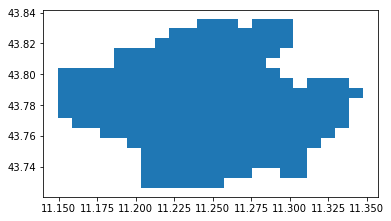

In [55]:
tessellation.plot()

In [45]:
# From a bounding box that contains all the points present in the dataframe

tdf = skmob.TrajDataFrame.from_file('./data/geolife_sample.txt.gz', sep=',')

gdf = tdf.to_geodataframe() 

tessellation = tilers.tiler.get("squared", base_shape=gdf, meters=10000)

# NOTE: It accepts also geodataframe with list of polygons

In [46]:
tdf.head()

,lat,lng,datetime,uid,geometry
0,39.984094,116.319236,2008-10-23 05:53:05,1,POINT (116.319236 39.984094)
1,39.984198,116.319322,2008-10-23 05:53:06,1,POINT (116.319322 39.984198)
2,39.984224,116.319402,2008-10-23 05:53:11,1,POINT (116.319402 39.984224)
3,39.984211,116.319389,2008-10-23 05:53:16,1,POINT (116.319389 39.984211)
4,39.984217,116.319422,2008-10-23 05:53:21,1,POINT (116.319422 39.984217)


## Construction of a `FlowDataFrame`

The `FlowDataFrame` can be created from:

- a python list or a numpy array
- a pandas `DataFrame`
- a python dictionary


It supports the input data format:
    
- `origin`, `destination`, `flow`, `datetime` (optional)

NOTE: the field `tessellation` is mandatory. In the case the tessellation doesn't have the field tile_ID, the name of this column must be specified with the argument `tile_id`.

### From `list`

In [4]:
# From a list

data_list = [[10, 1, 10, '2008-10-23 13:53:05'],
             [16, 23, 45, '2008-10-23 13:53:06'],
             [1, 11, 45, '2008-10-23 13:53:11']]

df = pd.DataFrame(data_list, columns=['flow_value', 
                  'origin_id', 'destination_id', 'datetime'])
df

,flow_value,origin_id,destination_id,datetime
0,10,1,10,2008-10-23 13:53:05
1,16,23,45,2008-10-23 13:53:06
2,1,11,45,2008-10-23 13:53:11


In [9]:
fdf = skmob.FlowDataFrame(df, origin='origin_id', destination='destination_id', 
                          tessellation=tessellation, 
                          flow='flow_value')
fdf

,flow,origin,destination,datetime
0,10,1,10,2008-10-23 13:53:05
1,16,23,45,2008-10-23 13:53:06
2,1,11,45,2008-10-23 13:53:11


In [34]:
# to access to the single flow
fdf.get_flow(1,10)

10

In [35]:
# TrajDataFrame can be converted into a sparse matrix of shape (len(tessellation), len(tessellation))
fdf.to_matrix()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### From `file`

FlowDataFrame  has its own method `from_file` to construct the object from an input csv file.

It supports two different data format for the flows:
    
- `origin`, `destination`, `flow`, `datetime` (optional)
- `origin_lat`, `origin_lng`, `destination_lat`, `destination_lng`, `flow`, `datetime` (optional)


In [5]:
import skmob
import pandas as pd
import geopandas as gpd
import numpy as np
import folium

from skmob.tessellation import tilers

In [2]:
tessellation = gpd.GeoDataFrame.from_file("data/NY_counties_2011.geojson")

fdf = skmob.FlowDataFrame.from_file("data/NY_commuting_flows_2011.csv",
                                    tessellation=tessellation, tile_id='tile_id', sep=",")

In [4]:
fdf.tessellation.dtypes

tile_ID       object
population     int64
geometry      object
dtype: object

In [5]:
fdf.dtypes

flow            int64
origin         object
destination    object
dtype: object

In [6]:
fdf.tessellation[:3]

,tile_ID,population,geometry
0,36019,81716,"POLYGON ((-74.006668 44.886017, -74.027389 44...."
1,36101,99145,"POLYGON ((-77.099754 42.274215, -77.0996569999..."
2,36107,50872,"POLYGON ((-76.25014899999999 42.296676, -76.24..."


In [7]:
fdf.head()

,flow,origin,destination
0,121606,36001,36001
1,5,36001,36005
2,29,36001,36007
3,11,36001,36017
4,30,36001,36019


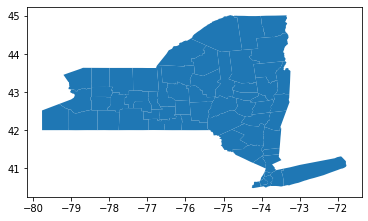

In [17]:
tessellation.plot()

## Plot tessellation

In [3]:
fdf.plot_tessellation()

## Plot flows

In [3]:
fdf.plot_flows()

In [4]:
map_f = fdf.plot_tessellation(popup_features=['tile_ID', 'population'], 
                              style_func_args={'color':'blue', 'fillColor':'blue'})

fdf[fdf['origin'] == '36061'].plot_flows(map_f=map_f, flow_exp=0., flow_popup=True)


#### Alternative format

In [39]:
# Flows can be provided also with an expanded format

df = pd.read_csv("data/expanded_flow.csv", sep=",")
df.head()

,origin_lat,origin_lng,destination_lat,destination_lng,flow
0,42.554151,-71.103398,42.553818,-71.102749,1
1,42.463658,-70.945966,42.463580,-70.945903,1
2,42.463552,-70.945845,42.463561,-70.945911,1
3,42.116042,-71.462125,42.116698,-71.461800,1
4,42.388193,-71.039085,42.388191,-71.039177,1


When the arguments `origin_lat`, `origin_lng`, `destination_lat`, `destination_lng` are set, `from_file` loads file with the expanded format and collapse each row into a format `origin`, `destination`.

If tessellation is None, it is imputed from the data as a Voronoi Tessellation that is then automatically added to the `FlowDataFrame`. NOTE: it can be slow when the Voronoi tessellation is big (> 100 points)

In [40]:
fdf = skmob.FlowDataFrame.from_file("data/expanded_flow.csv", origin_lat='origin_lat', origin_lng='origin_lng', 
                                        destination_lat='destination_lat', destination_lng='destination_lng', 
                                        flow='flow', sep=",")

In [41]:
fdf.head()

,flow,origin,destination
0,1,0,150
1,1,1,151
2,1,2,68
3,1,3,152
4,1,4,153


In [42]:
fdf.tessellation.head()

,tile_ID,geometry
0,0,POINT (-71.103398 42.554151)
1,1,POINT (-70.945966 42.463658)
2,2,POINT (-70.94584499999998 42.463552)
3,3,POINT (-71.462125 42.116042)
4,4,POINT (-71.039085 42.388193)


A common operation when dealing with mobility data is the construction of Origin-Destination Matrix. 
`TrajDataFrame` provides the method `to_flowdataframe` that build a OD Matrix (`FlowDataFrame`) using the trajectories. This function automatically compute the flows between places.

In [6]:
# Load trajectories (Beijing, China)
tdf = skmob.TrajDataFrame.from_file('./data/geolife_sample.txt.gz', sep=',')

# Build a tessellation over the city
tessellation = tilers.tiler.get("squared", base_shape="Beijing, China", meters=15000)

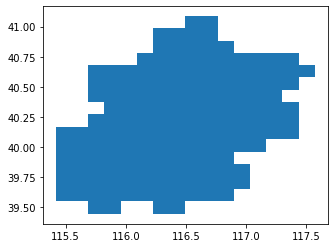

In [45]:
tessellation.plot()

In [8]:
from skmob.utils import plot

plot.plot_gdf(tessellation, popup_features=['tile_ID'])


In [49]:
tdf.head(3)

,lat,lng,datetime,uid,geometry
0,39.984094,116.319236,2008-10-23 05:53:05,1,POINT (116.319236 39.984094)
1,39.984198,116.319322,2008-10-23 05:53:06,1,POINT (116.319322 39.984198)
2,39.984224,116.319402,2008-10-23 05:53:11,1,POINT (116.319402 39.984224)


In [46]:
# remove_na enable removing points that are not contained in the tessellation
fdf = tdf.to_flowdataframe(tessellation=tessellation, self_loops=True, remove_na=True)

In [50]:
fdf.head(3)

,origin,destination,flow
0,49,49.0,788
1,49,62.0,1
2,50,50.0,4974
